# 16 : SPLITING A STRING INTO MULTIPLE COLUMN

In [25]:
# IMPORT LABRARIES 

import pandas as pd 

df = pd.DataFrame({ 
                    'Name' : ['Ishfaq Khan', 'Hammad Aziz', 'Kaif Khan'],
                    'Location' : ['Mianwali, Pakistan', 'Lahoure, Pakistan', 'Karachi, Sri Lanka']
                 })
            
df

,Name,Location
0,Ishfaq Khan,"Mianwali, Pakistan"
1,Hammad Aziz,"Lahoure, Pakistan"
2,Kaif Khan,"Karachi, Sri Lanka"


In [26]:
# SPLITING A COLUMN INTO TWO COLUMNS

df.Name.str.split(' ', expand=True)

,0,1
0,Ishfaq,Khan
1,Hammad,Aziz
2,Kaif,Khan


In [27]:
# ADDING THOSE SPLITING COLUMNS INTO THE DATAFRAME

df[['First_Name', 'Last_Name']] = df.Name.str.split(' ', expand=True)
df

,Name,Location,First_Name,Last_Name
0,Ishfaq Khan,"Mianwali, Pakistan",Ishfaq,Khan
1,Hammad Aziz,"Lahoure, Pakistan",Hammad,Aziz
2,Kaif Khan,"Karachi, Sri Lanka",Kaif,Khan


In [28]:
# SPLITING A COLUMN INTO TWO COLUMNS

df.Location.str.split(',', expand=True)

,0,1
0,Mianwali,Pakistan
1,Lahoure,Pakistan
2,Karachi,Sri Lanka


In [29]:
# ADDING THOSE SPLITING COLUMNS INTO THE DATAFRAME

df[['City', 'Country']] = df.Location.str.split(',', expand=True)
# df.drop(columns='Location')
df

,Name,Location,First_Name,Last_Name,City,Country
0,Ishfaq Khan,"Mianwali, Pakistan",Ishfaq,Khan,Mianwali,Pakistan
1,Hammad Aziz,"Lahoure, Pakistan",Hammad,Aziz,Lahoure,Pakistan
2,Kaif Khan,"Karachi, Sri Lanka",Kaif,Khan,Karachi,Sri Lanka


In [30]:
# REFINE DATA MANIPULATION

df = df[['First_Name', 'Last_Name', 'City', 'Country']]
df

,First_Name,Last_Name,City,Country
0,Ishfaq,Khan,Mianwali,Pakistan
1,Hammad,Aziz,Lahoure,Pakistan
2,Kaif,Khan,Karachi,Sri Lanka


# 17 : AGREIGATE BY MULTIPLE GROUPS / FUNCTIONS

In [32]:
import pandas as pd 
import seaborn as sns 

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [33]:
df.groupby('who').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
who,,,,,,,,,,,,,,
child,83,83,83,83,83,83,83,83,83,83,13,83,83,83
man,537,537,537,413,537,537,537,537,537,537,99,537,537,537
woman,271,271,271,218,271,271,271,269,271,271,91,269,271,271


In [37]:
df.groupby('who').sum(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
who,,,,,,,,
child,49,218,528.67,144,105,2721.2210,0,6
man,88,1274,13700.50,159,82,13352.0656,537,410
woman,205,565,6976.00,163,153,12620.6627,0,121


In [38]:
len(df.groupby('who'))

3

In [40]:
df.groupby(['sex', 'embark_town', 'who']).count()

survived  pclass  age  sibsp  parch  fare  embarked  \
sex    embark_town who                                                          
female Cherbourg   child        13      13   13     13     13    13        13   
                   woman        60      60   48     60     60    60        60   
       Queenstown  child         1       1    1      1      1     1         1   
                   woman        35      35   11     35     35    35        35   
       Southampton child        29      29   29     29     29    29        29   
                   woman       174     174  157    174    174   174       174   
male   Cherbourg   child         5       5    5      5      5     5         5   
                   man          90      90   64     90     90    90        90   
       Queenstown  child         4       4    4      4      4     4         4   
                   man          37      37   12     37     37    37        37   
       Southampton child        31      31   31     31     31    31        31   
                   man         410     410  337    410    410   410       410   

                          class  adult_male  deck  alive  alone  
sex    embark_town who                                           
female Cherbourg   child     13          13     0     13     13  
                   woman     60          60    37     60     60  
       Queenstown  child      1           1     0      1      1  
                   woman     35          35     2     35     35  
       Southampton child     29          29     6     29     29  
                   woman    174         174    50    174    174  
male   Cherbourg   child      5           5     0      5      5  
                   man       90          90    32     90     90  
       Queenstown  child      4           4     0      4      4  
                   man       37          37     2     37     37  
       Southampton child     31          31     7     31     31  
                   man      410         410    65    410    410

# 18 : SELECT SPECFIC ROWS AND COLUMNS

In [42]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [43]:
# SELECT COLUMN

df[['sex', 'age']]

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
...,...,...
886,male,27.0
887,female,19.0
888,female,NaN
889,male,26.0


In [44]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
df.describe().loc[['min', '25%', '50%', '75%', 'max']]

,survived,pclass,age,sibsp,parch,fare
min,0.0,1.0,0.420,0.0,0.0,0.0000
25%,0.0,2.0,20.125,0.0,0.0,7.9104
50%,0.0,3.0,28.000,0.0,0.0,14.4542
75%,1.0,3.0,38.000,1.0,0.0,31.0000
max,1.0,3.0,80.000,8.0,6.0,512.3292


In [46]:
df.describe().loc['min' : 'max']

,survived,pclass,age,sibsp,parch,fare
min,0.0,1.0,0.420,0.0,0.0,0.0000
25%,0.0,2.0,20.125,0.0,0.0,7.9104
50%,0.0,3.0,28.000,0.0,0.0,14.4542
75%,1.0,3.0,38.000,1.0,0.0,31.0000
max,1.0,3.0,80.000,8.0,6.0,512.3292


In [49]:
df.describe().loc['min' : 'max' , ['survived', 'age']]
df.describe().loc['min' : 'max' , 'age']
df.describe().loc['min' : 'max' , 'survived' : 'sibsp']

,survived,pclass,age,sibsp
min,0.0,1.0,0.420,0.0
25%,0.0,2.0,20.125,0.0
50%,0.0,3.0,28.000,0.0
75%,1.0,3.0,38.000,1.0
max,1.0,3.0,80.000,8.0


# 19 : RESHAPE MULTIINDEX SERIES

In [50]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [51]:
df.survived.mean()

0.3838383838383838

In [52]:
df.groupby('sex').survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [54]:
df.groupby(['sex', 'class'], observed=True).survived.mean()

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [55]:
df.groupby(['sex', 'class'], observed=True).survived.mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# 20 : COUNTINOUS DATA TO CATOGRICAL DATA CONVERSION

In [56]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [57]:
df.age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [59]:
pd.cut(df.age, bins=[0, 18, 25, 99], labels=['Child', 'Young_Adult', 'Adult'])

# ADDING NEW COLUMN IN THE DATAFRAME 
df['New_age'] = pd.cut(df.age, bins=[0, 18, 25, 99], labels=['Child', 'Young_Adult', 'Adult'])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,New_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Young_Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,Adult
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,Young_Adult
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,Adult


# 21 : ONE SET OF VALUES INTO ANOTHER SET 

In [60]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,New_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Young_Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult


In [61]:
df.sex.head()

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object

In [63]:
df['sex_num'] = df.sex.map({'male' : 0, 'female' : 1})
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,New_age,sex_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Young_Adult,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Adult,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,Adult,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,Young_Adult,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,1
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,Adult,0


In [64]:
df.embarked.head()

0    S
1    C
2    S
3    S
4    S
Name: embarked, dtype: object

In [65]:
df.embarked.count()

889

In [66]:
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [73]:
df.embarked.factorize()[0]
df['embarked_num'] = df.embarked.factorize()[0]
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,New_age,sex_num,embarked_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Young_Adult,0,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult,1,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Adult,1,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult,1,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,Adult,0,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,Young_Adult,1,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,1,0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,Adult,0,1


# 22 : TRANSPOSE A WIDE DATA FRAME 

In [78]:
import pandas as pd
import numpy as np 


In [82]:
df = pd.DataFrame(np.random.rand(200, 25), columns=list('abcdefghijklmnopqrstuvwxy'))
df.head()

,a,b,c,d,e,f,g,h,i,j,...,p,q,r,s,t,u,v,w,x,y
0,0.424748,0.456240,0.170087,0.400231,0.671785,0.676803,0.166149,0.547161,0.511457,0.091296,...,0.885698,0.328209,0.785250,0.409466,0.698764,0.402980,0.247289,0.326307,0.058390,0.699228
1,0.799333,0.211273,0.667311,0.405478,0.140925,0.247869,0.115192,0.103142,0.986047,0.935910,...,0.234096,0.216219,0.052977,0.902358,0.385299,0.449864,0.316799,0.980623,0.382187,0.043583
2,0.729921,0.157685,0.328164,0.775179,0.713176,0.650464,0.350243,0.684409,0.664342,0.468017,...,0.413878,0.159726,0.768351,0.690015,0.716660,0.344548,0.427531,0.688426,0.216406,0.957823
3,0.526906,0.608216,0.433205,0.377124,0.983469,0.960436,0.661363,0.437415,0.183328,0.177475,...,0.591373,0.102830,0.218933,0.779515,0.952922,0.222000,0.489348,0.587923,0.128268,0.816104
4,0.685597,0.727214,0.201525,0.597984,0.035981,0.192822,0.271828,0.017366,0.253750,0.136324,...,0.712141,0.412492,0.902927,0.194145,0.815893,0.721689,0.519929,0.804263,0.047645,0.438324


In [83]:
df.head().T

,0,1,2,3,4
a,0.424748,0.799333,0.729921,0.526906,0.685597
b,0.456240,0.211273,0.157685,0.608216,0.727214
c,0.170087,0.667311,0.328164,0.433205,0.201525
d,0.400231,0.405478,0.775179,0.377124,0.597984
e,0.671785,0.140925,0.713176,0.983469,0.035981
f,0.676803,0.247869,0.650464,0.960436,0.192822
g,0.166149,0.115192,0.350243,0.661363,0.271828
h,0.547161,0.103142,0.684409,0.437415,0.017366
i,0.511457,0.986047,0.664342,0.183328,0.253750
j,0.091296,0.935910,0.468017,0.177475,0.136324


In [84]:
df.describe()

,a,b,c,d,e,f,g,h,i,j,...,p,q,r,s,t,u,v,w,x,y
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.507886,0.495952,0.519705,0.472324,0.492680,0.512984,0.497977,0.529678,0.503538,0.501475,...,0.531172,0.534434,0.528172,0.519062,0.511495,0.476487,0.492190,0.525188,0.501141,0.473702
std,0.284853,0.293155,0.282630,0.309188,0.291147,0.284331,0.278244,0.291897,0.282681,0.269015,...,0.287236,0.286941,0.275617,0.291385,0.280338,0.279213,0.279792,0.289155,0.300088,0.276360
min,0.004726,0.001656,0.010262,0.000804,0.011506,0.004068,0.006756,0.003724,0.004399,0.005618,...,0.003601,0.000274,0.005974,0.008682,0.014643,0.004105,0.000101,0.006801,0.006539,0.010184
25%,0.250953,0.235445,0.249587,0.207257,0.243609,0.257532,0.262088,0.283835,0.249820,0.305394,...,0.277871,0.298058,0.282391,0.241486,0.269256,0.228904,0.263360,0.251513,0.227302,0.241744
50%,0.501090,0.459875,0.554161,0.467177,0.486793,0.536116,0.474682,0.531727,0.510634,0.515552,...,0.510443,0.545574,0.579032,0.533978,0.513830,0.451487,0.486650,0.553947,0.509051,0.457715
75%,0.768121,0.736798,0.767964,0.765325,0.745177,0.745373,0.727609,0.818725,0.735103,0.695467,...,0.795870,0.790983,0.753339,0.779840,0.739999,0.680202,0.708862,0.776569,0.800358,0.703899
max,0.987531,0.999659,0.998828,0.997566,0.999731,0.992199,0.999758,0.998671,0.997785,0.995739,...,0.990615,0.994141,0.998776,0.999071,0.983778,0.998536,0.995279,0.999433,0.995580,0.989608


In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
a,200.0,0.507886,0.284853,0.004726,0.250953,0.501090,0.768121,0.987531
b,200.0,0.495952,0.293155,0.001656,0.235445,0.459875,0.736798,0.999659
c,200.0,0.519705,0.282630,0.010262,0.249587,0.554161,0.767964,0.998828
d,200.0,0.472324,0.309188,0.000804,0.207257,0.467177,0.765325,0.997566
e,200.0,0.492680,0.291147,0.011506,0.243609,0.486793,0.745177,0.999731
f,200.0,0.512984,0.284331,0.004068,0.257532,0.536116,0.745373,0.992199
g,200.0,0.497977,0.278244,0.006756,0.262088,0.474682,0.727609,0.999758
h,200.0,0.529678,0.291897,0.003724,0.283835,0.531727,0.818725,0.998671
i,200.0,0.503538,0.282681,0.004399,0.249820,0.510634,0.735103,0.997785
j,200.0,0.501475,0.269015,0.005618,0.305394,0.515552,0.695467,0.995739


# 23 : RESHAPING A DATAFRAME

In [86]:
fasla = pd.DataFrame([['12345', 100, 200, 300], ['34567', 400, 500, 600], ['67890', 700, 800, 900]], 
                        columns=['zip', 'factory', 'warehouse', 'retail'])

fasla.head()

,zip,factory,warehouse,retail
0,12345,100,200,300
1,34567,400,500,600
2,67890,700,800,900


In [87]:
fasla2 = pd.DataFrame([[1, '12345', 'factory'], [2, '34567', 'warehouse']], 
                        columns=['user_id', 'zip', 'location'])

fasla2.head()

,user_id,zip,location
0,1,12345,factory
1,2,34567,warehouse


In [90]:
fasla_long = fasla.melt(id_vars='zip', var_name='location', value_name='distance')
fasla_long

,zip,location,distance
0,12345,factory,100
1,34567,factory,400
2,67890,factory,700
3,12345,warehouse,200
4,34567,warehouse,500
5,67890,warehouse,800
6,12345,retail,300
7,34567,retail,600
8,67890,retail,900


<Axes: xlabel='zip', ylabel='distance'>

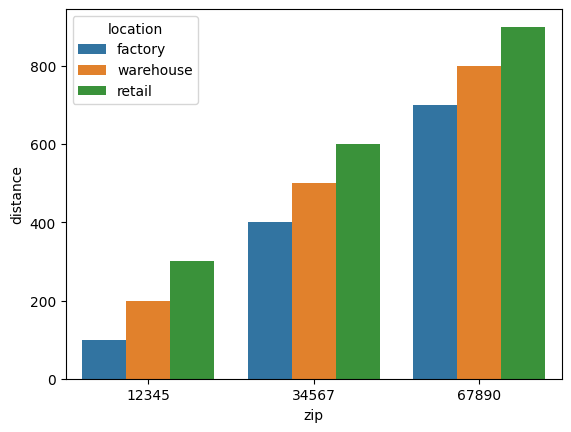

In [91]:
sns.barplot(x='zip', y='distance', hue='location', data=fasla_long)